In [3]:
import pandas as pd
import numpy as np

Link to the source code:
https://www.kaggle.com/datasets/shwetabh123/mall-customers 

In [4]:
customers = pd.read_csv('./data/mallcustomers.csv')
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60560.00,26264.721165,15000.0,41500.00,61500.0,78000.00,137000.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
customers.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.88,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.97,18.0,28.75,36.0,49.0,70.0
Income,200.0,NaN,NaN,NaN,60560.0,26264.72,15000.0,41500.0,61500.0,78000.0,137000.0
SpendingScore,200.0,NaN,NaN,NaN,50.2,25.82,1.0,34.75,50.0,73.0,99.0


A visual exploration of the dataset can provide us with some additional insight.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\4180868462.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers,


<Axes: xlabel='Gender', ylabel='Income'>

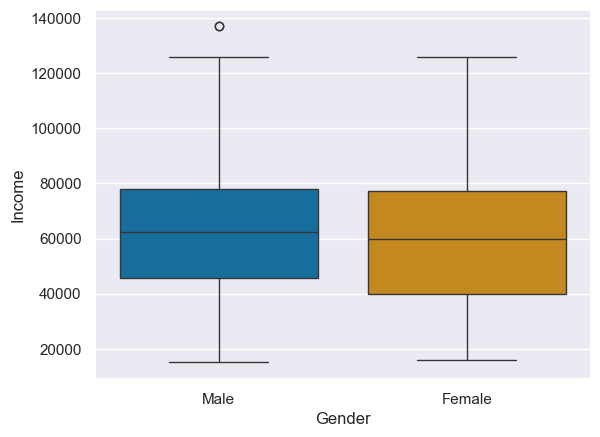

In [9]:
sns.boxplot(data=customers,
           x='Gender',
           y='Income',
           palette='colorblind')

C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\2857844124.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers,


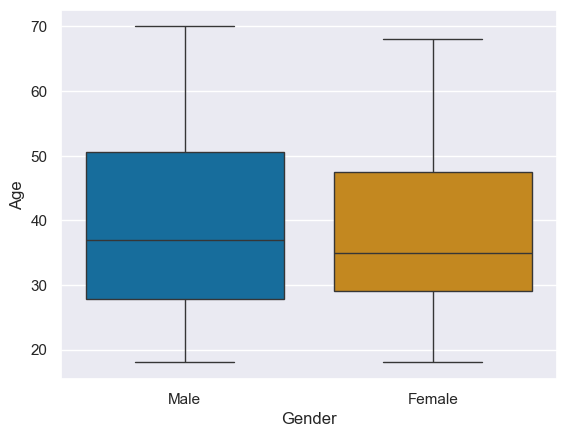

In [10]:
sns.boxplot(data=customers,
           x='Gender',
           y='Age',
           palette='colorblind');

C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\2626265767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers,


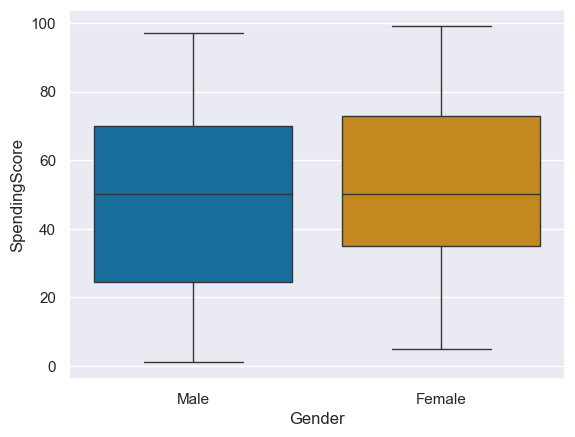

In [11]:
sns.boxplot(data=customers,
           x='Gender',
           y='SpendingScore',
           palette='colorblind');

<Axes: xlabel='Age', ylabel='Income'>

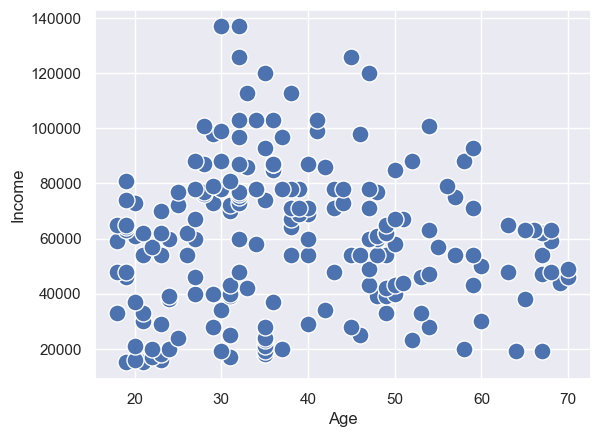

In [12]:
sns.scatterplot(data=customers,
               x='Age',
               y='Income',
               s=150)

<Axes: xlabel='Age', ylabel='SpendingScore'>

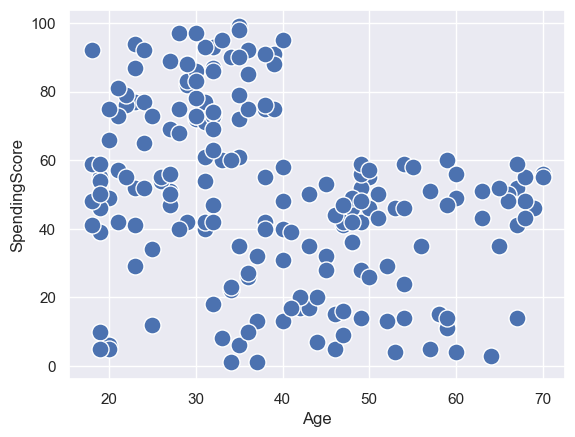

In [13]:
sns.scatterplot(data=customers,
               x='Age',
               y='SpendingScore',
               s=150)

<Axes: xlabel='Income', ylabel='SpendingScore'>

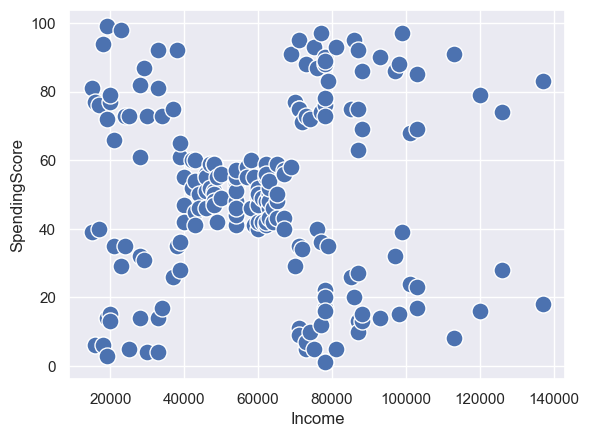

In [14]:
sns.scatterplot(data=customers,
               x='Income',
               y='SpendingScore',
               s=150)

## 3. Prepare the Data

In [15]:
customers[['Income', 'SpendingScore']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,200.0,60560.0,26264.72,15000.0,41500.00,61500.0,78000.0,137000.0
SpendingScore,200.0,50.2,25.82,1.0,34.75,50.0,73.0,99.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [18]:
customers_scaled = pd.DataFrame(customers_scaled, columns=['Income', 'SpendingScore'])

In [19]:
customers_scaled.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Income,200.0,-0.0,1.0,-2.0,-1.0,0.0,1.0,3.0
SpendingScore,200.0,-0.0,1.0,-2.0,-1.0,-0.0,1.0,2.0


**The approach we have used is called `z-score normalization`. Now we can see that data are in same scale.**

## 3. Create the Clusters

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=3, n_init=25, random_state=1234)

n_init is the number of times the model runs with different centroid points

In [22]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [23]:
# to get cluster assignments
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [48]:
# this is Total Within Cluster Sum of Squares (WCSS) for the cluster
km.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia'

## 4. Evaluate and Visualize the Clusters 

### Evaluation

This is to see if a single cluster is rather large or rather small in comparison to others, it may need further attention

In [25]:
# let's see how many instances are in each clusters
pd.Series(km.labels_).value_counts().sort_index()

0     38
1     39
2    123
Name: count, dtype: int64

### NOTE:
There are 123 instances in first cluster and 38 instances in 2nd cluster and 39 instances in final cluster.
This means first cluster needs further attention as it is very large compared to other two clusters.

### Cluster Centriods
This also provide info about the clusters.

In [26]:
# let's see the cluster centroids
km.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [27]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                              columns=['Income', 'SpendingScore'])

cluster_centers

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


### Visualize to see the quality of the clusters

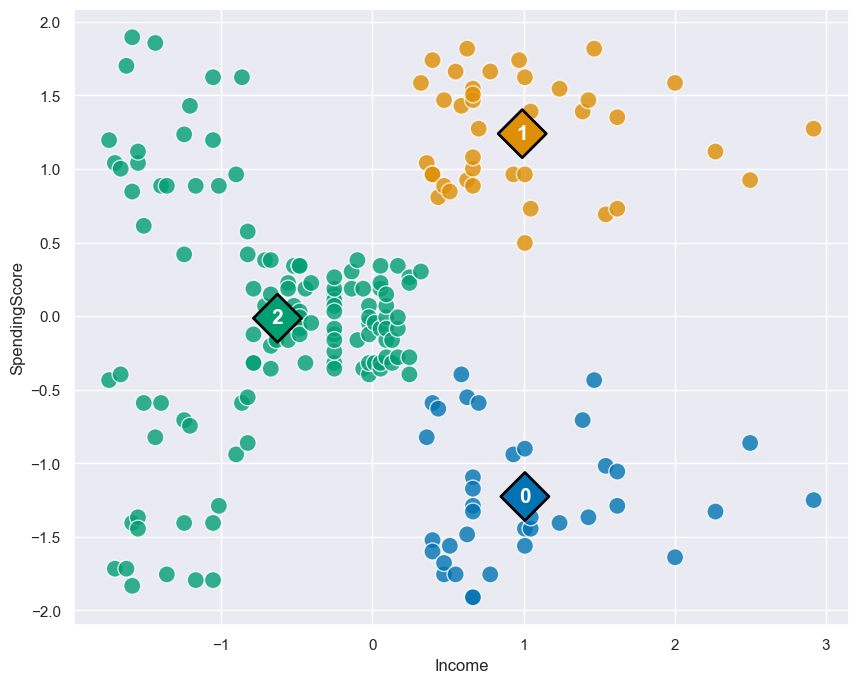

In [28]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\418503582.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_norm = np.concatenate((values_norm, [values_norm[0]]))


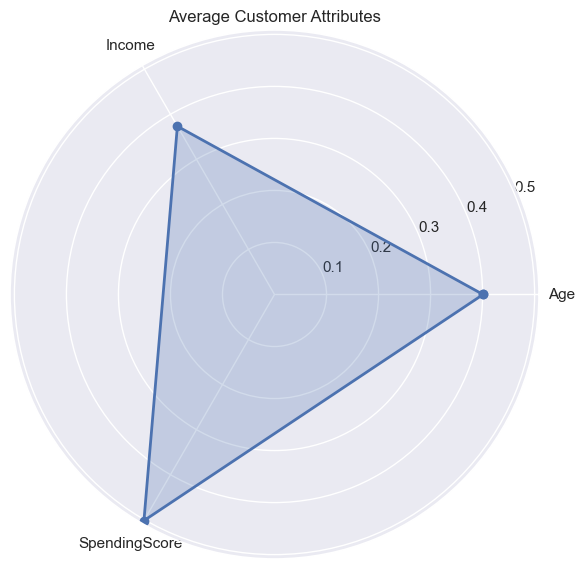

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=customers

# Calculate average values for all customers
overall_averages = df[['Age', 'Income', 'SpendingScore']].mean()

# Prepare the data for the radar chart
categories = ['Age', 'Income', 'SpendingScore']
values = overall_averages.values

# Normalize the values to a 0-1 scale for better visualization
values_norm = (values - df[categories].min()) / (df[categories].max() - df[categories].min())

# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# Close the plot by appending the first value to the end
values_norm = np.concatenate((values_norm, [values_norm[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))

# Plot the data
ax.plot(angles, values_norm, 'o-', linewidth=2)
ax.fill(angles, values_norm, alpha=0.25)

# Set the category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add title
plt.title('Average Customer Attributes')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\802702085.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((values, [values[0]]))  # Complete the loop


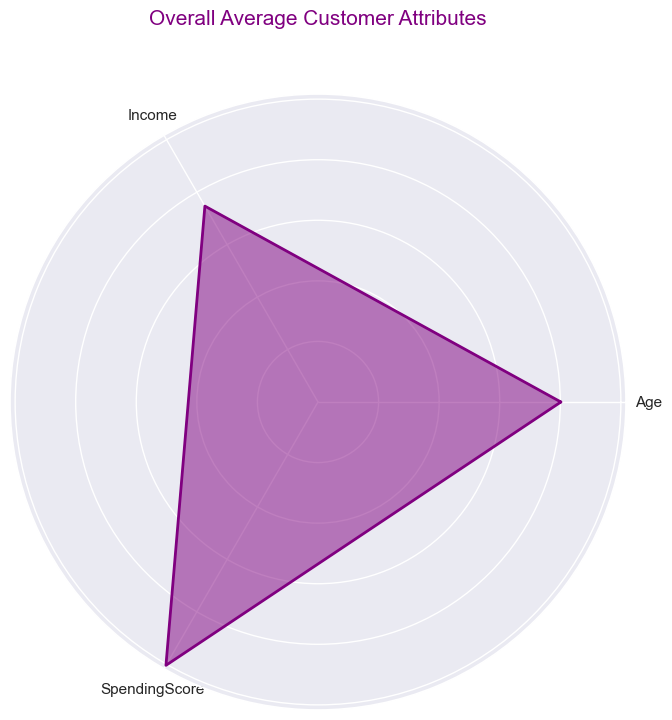

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Use the existing DataFrame 'customers'
df = customers

# Calculate overall average values
average_values = df[['Age', 'Income', 'SpendingScore']].mean()

# Prepare data for radar chart
categories = ['Age', 'Income', 'SpendingScore']
num_vars = len(categories)

# Radar chart function
def radar_chart(values, labels, title, color):
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  # Complete the loop
    angles += angles[:1]
    
    # Create the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color=color, alpha=0.5)  # Adjust alpha for transparency
    ax.plot(angles, values, color=color, linewidth=2)
    
    # Add labels and title
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, size=15, color=color, y=1.1)
    
    plt.show()

# Normalize the values to a 0-1 scale for better visualization
values_norm = (average_values - df[categories].min()) / (df[categories].max() - df[categories].min())

# Plot radar chart for overall average
radar_chart(values_norm, categories, 'Overall Average Customer Attributes', 'purple')

## 5. Choose the right number of Clusters

### Approach 1) The Within Cluster Sum of Squares (WCSS)
tighty coupled data points with respect to number of clusters

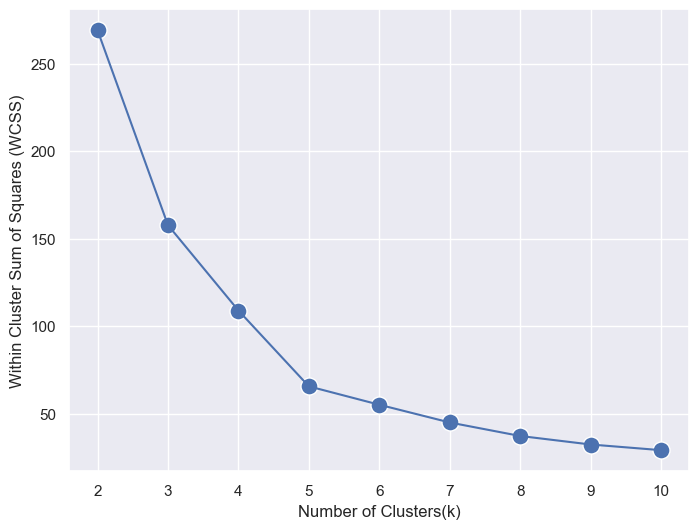

In [31]:
wcss = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_) #get the wcss value of that particular model
    
# create as panda series
wcss_series = pd.Series(wcss, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=wcss_series.index, y=wcss_series)
ax = sns.scatterplot(x=wcss_series.index, y=wcss_series, s=150)

ax = ax.set(xlabel='Number of Clusters(k)',
           ylabel = 'Within Cluster Sum of Squares (WCSS)')

**Based on above chart, we can assume that elbow value is 5.**

Let's see what value we can get from other methods.

### Approach 2) The Average Silhouette Score
Average Silhouette Score:

This score tells you how well each data point fits into its assigned cluster.
It ranges from -1 to 1.
A high score (close to 1) means the data point is well-matched to its cluster and poorly-matched to other clusters.
A low score (close to -1) means the point might be in the wrong cluster.
An average score close to 1 indicates good clustering.

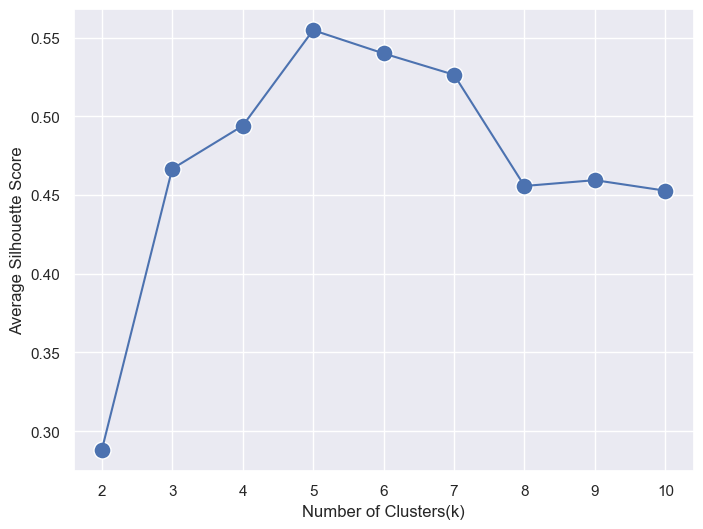

In [32]:
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    silhouette_value = silhouette_score(customers_scaled, km.labels_) # get the shilouette score
    silhouette.append(silhouette_value)
    
# create as series
silhouette_series = pd.Series(silhouette, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=silhouette_series.index, y=silhouette_series)
ax = sns.scatterplot(x=silhouette_series.index, y=silhouette_series, s=150)

ax = ax.set(xlabel='Number of Clusters(k)',
           ylabel='Average Silhouette Score')

In [33]:
customers_scaled

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### Approach 3) The Calinski Harabasz Score
Calinski-Harabasz Score:

This score compares the spread of clusters to the spread within clusters.
Higher scores indicate better-defined clusters.
It works well when clusters are dense and well-separated.
There's no fixed range for this score; you compare scores for different numbers of clusters.
It's like measuring how distinct your clusters are from each other.

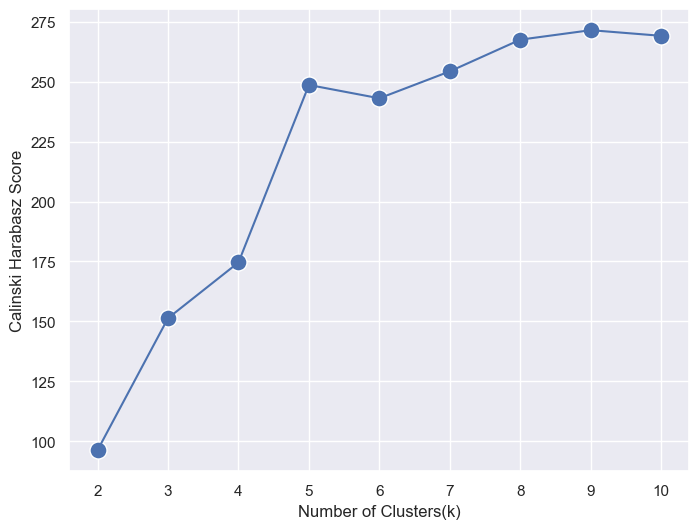

In [34]:
from sklearn.metrics import calinski_harabasz_score

calinski = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    calinski_value = calinski_harabasz_score(customers_scaled, km.labels_)
    calinski.append(calinski_value)
    
# create into series
calinski_series = pd.Series(calinski, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x=calinski_series.index, y=calinski_series)
ax = sns.scatterplot(x=calinski_series.index, y=calinski_series, s=150)

ax = ax.set(xlabel = 'Number of Clusters(k)',
           ylabel='Calinski Harabasz Score')

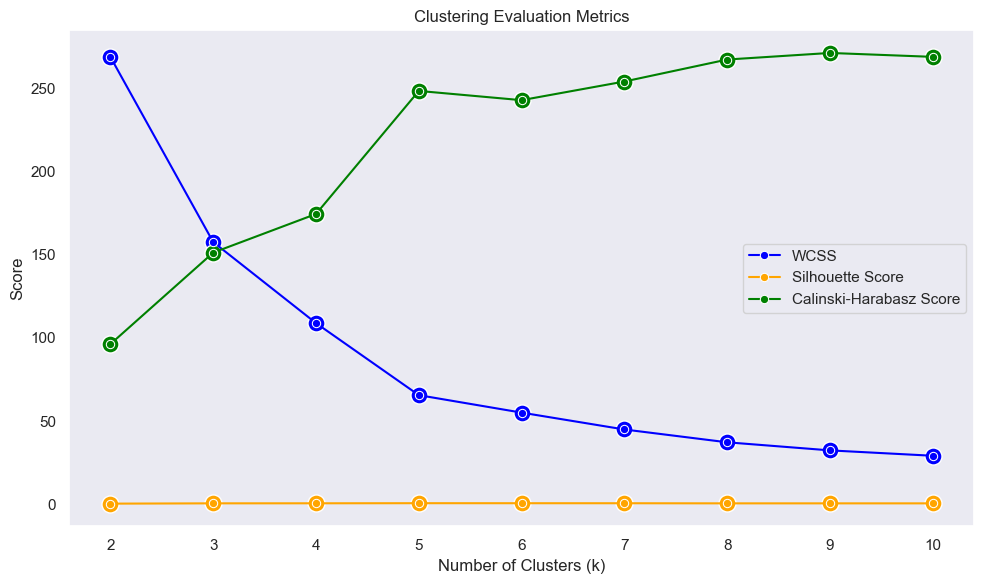

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Assuming customers_scaled is already defined and scaled

# Calculate WCSS
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

# Calculate Silhouette Scores
silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    silhouette_value = silhouette_score(customers_scaled, km.labels_)
    silhouette.append(silhouette_value)

# Calculate Calinski-Harabasz Scores
calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    calinski_value = calinski_harabasz_score(customers_scaled, km.labels_)
    calinski.append(calinski_value)

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Number of Clusters (k)': range(2, 11),
    'WCSS': wcss,
    'Silhouette Score': silhouette,
    'Calinski-Harabasz Score': calinski
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot WCSS
sns.lineplot(data=metrics_df, x='Number of Clusters (k)', y='WCSS', color='blue', label='WCSS', marker='o')
sns.scatterplot(data=metrics_df, x='Number of Clusters (k)', y='WCSS', color='blue', s=150)

# Plot Silhouette Score
sns.lineplot(data=metrics_df, x='Number of Clusters (k)', y='Silhouette Score', color='orange', label='Silhouette Score', marker='o')
sns.scatterplot(data=metrics_df, x='Number of Clusters (k)', y='Silhouette Score', color='orange', s=150)

# Plot Calinski-Harabasz Score
sns.lineplot(data=metrics_df, x='Number of Clusters (k)', y='Calinski-Harabasz Score', color='green', label='Calinski-Harabasz Score', marker='o')
sns.scatterplot(data=metrics_df, x='Number of Clusters (k)', y='Calinski-Harabasz Score', color='green', s=150)

# Adding labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Clustering Evaluation Metrics')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
customers_scaled

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## 6. Analyze and Interpret the Clusters

In [37]:
# we gonna use k=5 for our final model

km = KMeans(n_clusters=5, n_init=25, random_state=1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [38]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617]])

In [39]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])

cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-0.200913,-0.026456


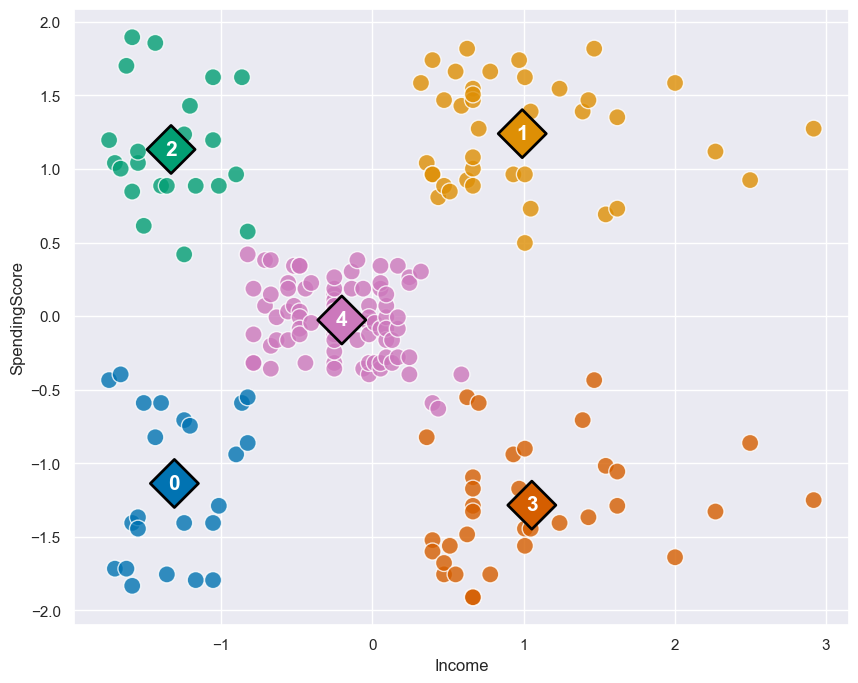

In [40]:
# Plot the value
plt.figure(figsize=(10, 8))

# Plot the clusters
ax = sns.scatterplot(data=customers_scaled,
                    x='Income',
                    y='SpendingScore',
                    hue=km.labels_,
                    palette='colorblind',
                    alpha=0.8,
                    s=150,
                    legend=False)

#Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                    x='Income',
                    y='SpendingScore',
                    hue=cluster_centers.index,
                    palette='colorblind',
                    s=600,
                    marker='D',
                    ec='black',
                    legend=False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Income[i],
                y=cluster_centers.SpendingScore[i],
                s=i,
                horizontalalignment='center',
                verticalalignment='center',
                size=15,
                weight='bold',
                color='white')

In [41]:
# Add Cluster as a new column back to Original Dataset
customers['Cluster'] = km.labels_.tolist()

customers.head()

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,2
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,2
4,5,Female,31,17000,40,0


In [42]:
customers = pd.get_dummies(customers, columns=['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,False,True
1,2,21,15000,81,2,False,True
2,3,20,16000,6,0,True,False
3,4,23,16000,77,2,True,False
4,5,31,17000,40,0,True,False
5,6,22,17000,76,2,True,False
6,7,35,18000,6,0,True,False
7,8,23,18000,94,2,True,False
8,9,64,19000,3,0,False,True
9,10,30,19000,72,2,True,False


In [43]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

We can see that for Gender column based on summary statistics, about 56% are Female and 44% are Male.

In [44]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0


C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\3224230603.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((values, [values[0]]))  # Complete the loop


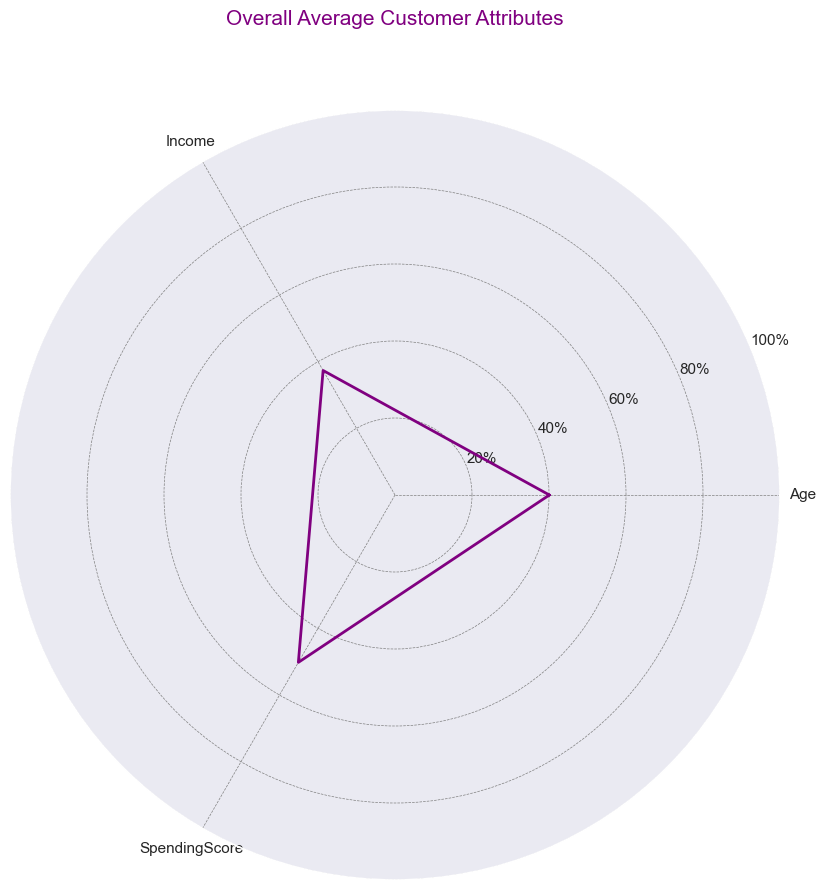

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate overall average values
average_values = customers[['Age', 'Income', 'SpendingScore']].mean()

# Prepare data for radar chart
categories = ['Age', 'Income', 'SpendingScore']
num_vars = len(categories)

# Radar chart function
def radar_chart(values, labels, title, color):
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  # Complete the loop
    angles += angles[:1]
    
    # Create the radar chart
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Plot the outline of the radar chart
    ax.plot(angles, values, color=color, linewidth=2)
    
    # Add labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, size=15, color=color, y=1.1)
    
    # Add scale
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0.2, 1.2, 0.2))
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    
    # Add grid
    ax.grid(True, color='grey', linestyle='--', linewidth=0.5)
    
    plt.show()

# Normalize the values to a 0-1 scale for better visualization
values_norm = (average_values - customers[categories].min()) / (customers[categories].max() - customers[categories].min())

# Plot radar chart for overall average
radar_chart(values_norm, categories, 'Overall Average Customer Attributes', 'purple')

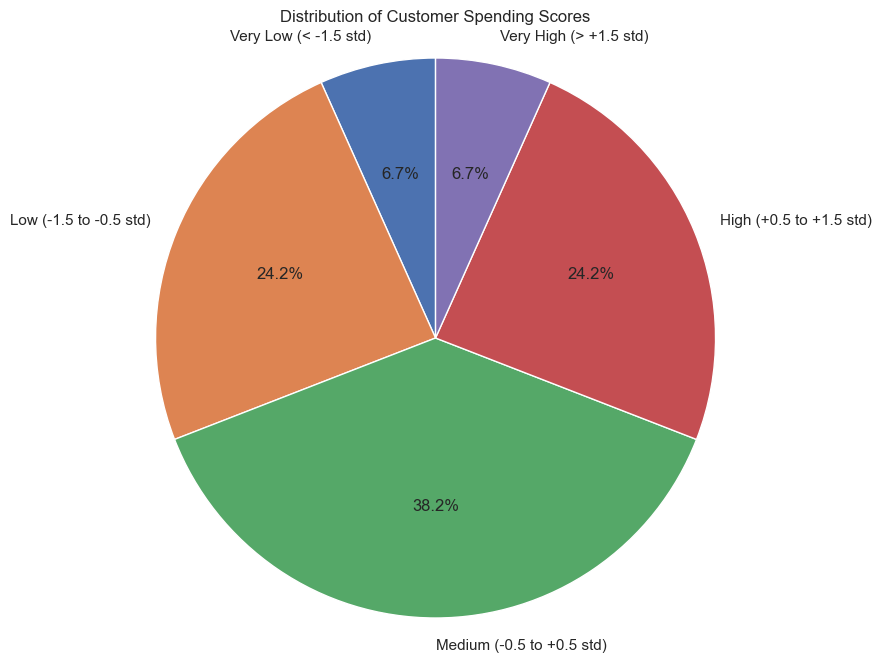

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# We know the mean spending score is 50.2 and std dev is 25.8
mean_spending = 50.2
std_spending = 25.8

# Let's create categories based on standard deviations from the mean
categories = [
    'Very Low (< -1.5 std)',
    'Low (-1.5 to -0.5 std)',
    'Medium (-0.5 to +0.5 std)',
    'High (+0.5 to +1.5 std)',
    'Very High (> +1.5 std)'
]

# We don't have the exact distribution, so let's approximate using a normal distribution
percentages = [
    6.7,  # Approximately % below -1.5 std
    24.2,  # Approximately % between -1.5 and -0.5 std
    38.2,  # Approximately % between -0.5 and +0.5 std
    24.2,  # Approximately % between +0.5 and +1.5 std
    6.7   # Approximately % above +1.5 std
]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Spending Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\2954374357.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customers, x='Cluster', y='Age', palette='colorblind', ax=axes[0])
C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\2954374357.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customers, x='Cluster', y='Income', palette='colorblind', ax=axes[1])
C:\Users\sahee\AppData\Local\Temp\ipykernel_14396\2954374357.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customers, x='Cluster', y='SpendingScore', p

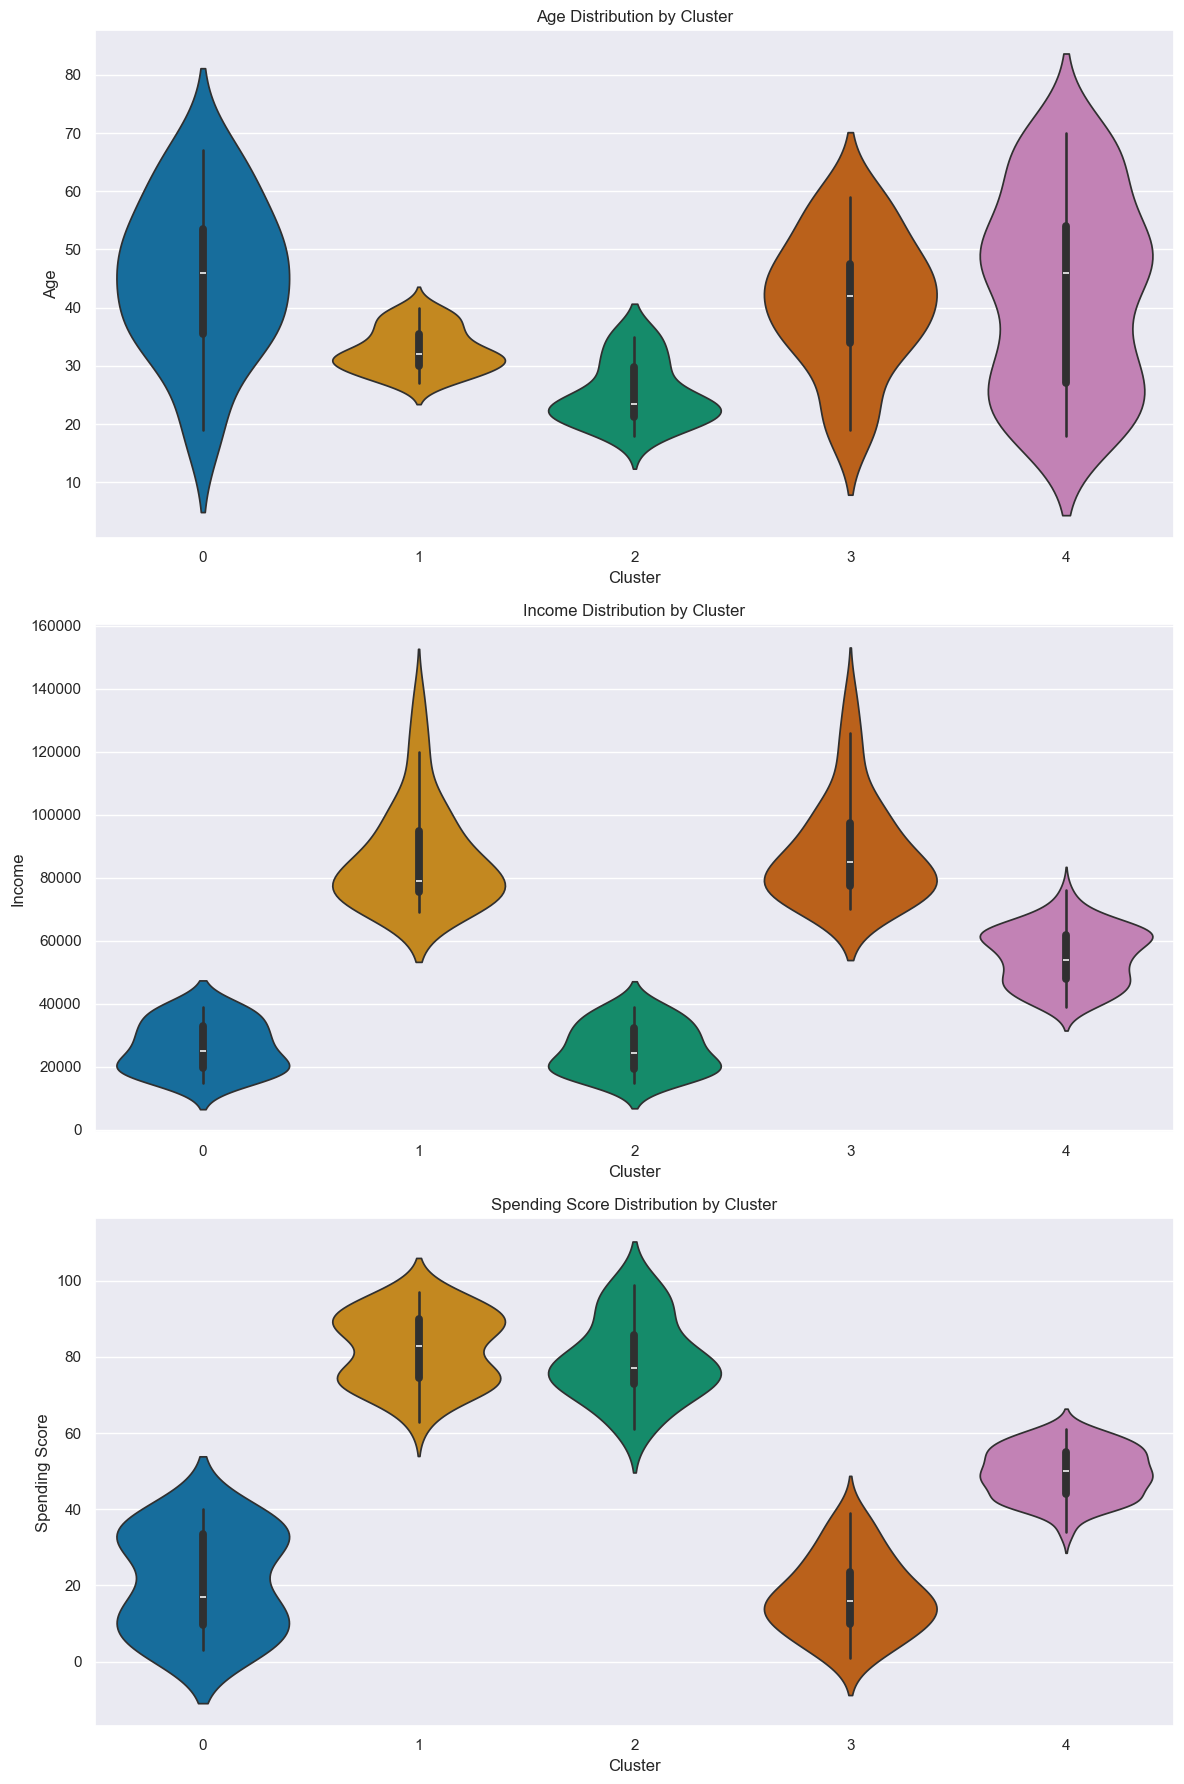

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme()

# Plot the violin plots for Age, Income, and SpendingScore by Cluster
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Violin plot for Age by Cluster
sns.violinplot(data=customers, x='Cluster', y='Age', palette='colorblind', ax=axes[0])
axes[0].set_title('Age Distribution by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Age')

# Violin plot for Income by Cluster
sns.violinplot(data=customers, x='Cluster', y='Income', palette='colorblind', ax=axes[1])
axes[1].set_title('Income Distribution by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Income')

# Violin plot for SpendingScore by Cluster
sns.violinplot(data=customers, x='Cluster', y='SpendingScore', palette='colorblind', ax=axes[2])
axes[2].set_title('Spending Score Distribution by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Spending Score')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()
